In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [2]:
df = pd.read_csv('D:\\classes\\Python Course\\Jeet Sir\\AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.shape

(144, 2)

In [6]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df['Month']=pd.to_datetime(df['Month'], format='%Y-%m')

In [9]:
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [10]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [11]:
df.rename(columns= {'#Passengers':'Passengers'}, inplace = True)

In [12]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

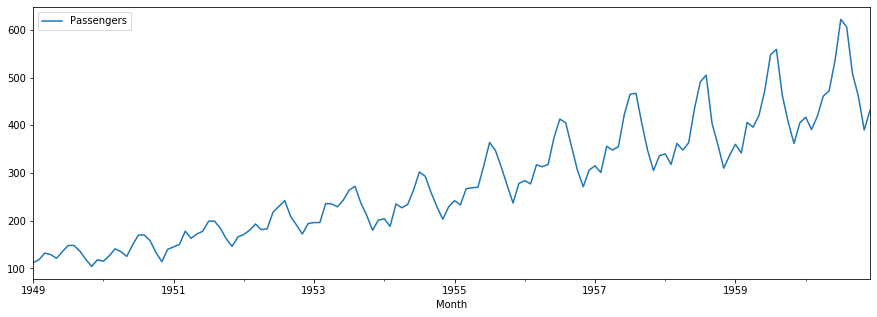

In [13]:
df.plot.line(x = 'Month', y = 'Passengers', figsize = (15,5))
plt.show()

In [14]:
Data = df.groupby('Month')['Passengers'].sum().reset_index()

In [15]:
Data.describe()


,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [16]:
Data.set_index('Month', inplace = True)
Data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [17]:
Data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Checking Stationarity

In [18]:
x = Data['Passengers'].resample('MS').mean()
x

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

In [19]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot Staticstics 
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    result = adfuller(timeseries)
    print('ADF Statistics: %f' % result[0])
    print('P Value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t %s:%.3f' %(key, value))

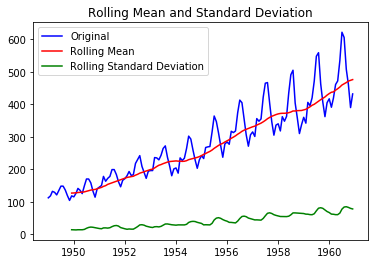

ADF Statistics: 0.815369
P Value: 0.991880
Critical Values:
	 1%:-3.482
	 5%:-2.884
	 10%:-2.579


In [20]:
test_stationarity(x)

# Trend Analysis

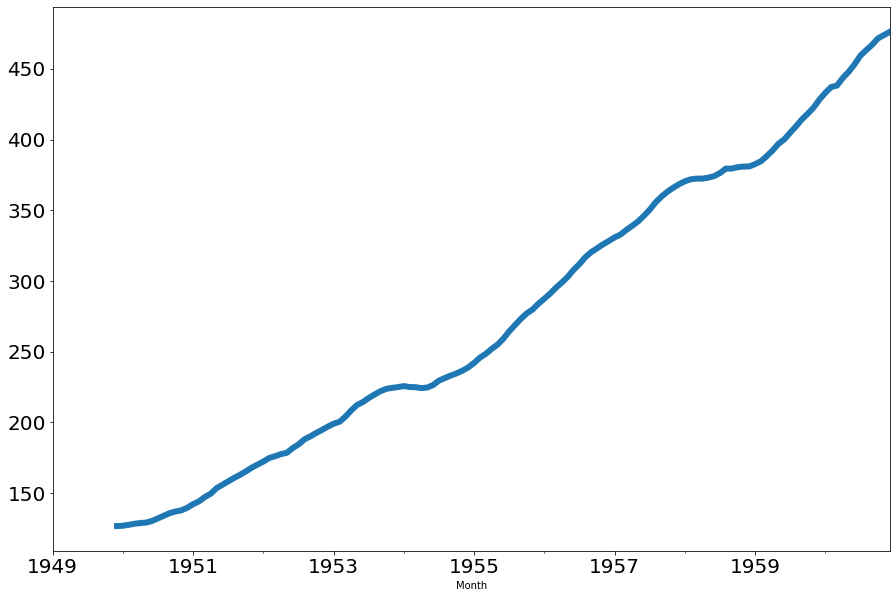

In [21]:
passenger = Data['Passengers']
passenger.rolling(12).mean().plot(figsize = (15,10), linewidth = 6, fontsize = 20)
plt.show()

# Seasonality Analysis

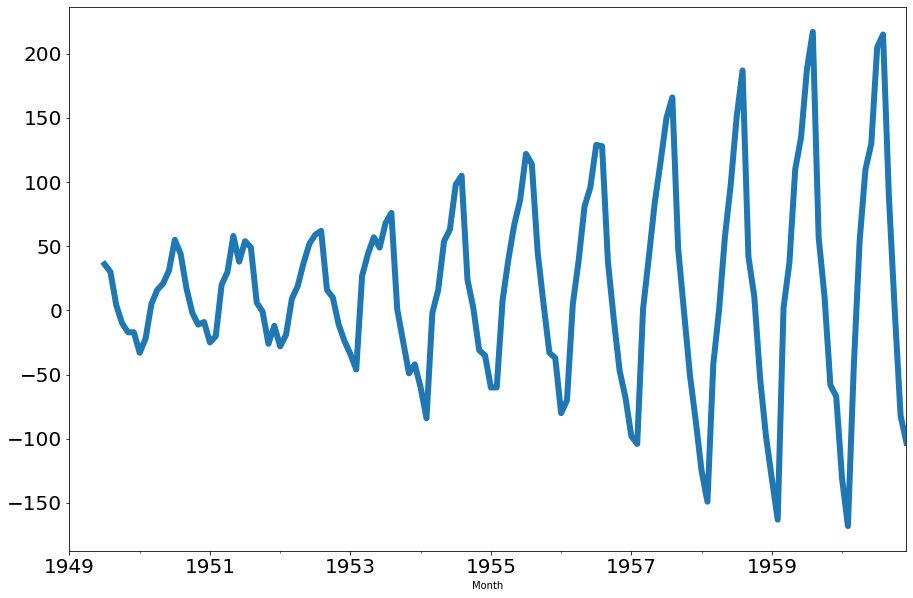

In [22]:
passenger.diff(periods = 6).plot(figsize = (15,10), linewidth = 6, fontsize = 20)
plt.show()

# Differencing

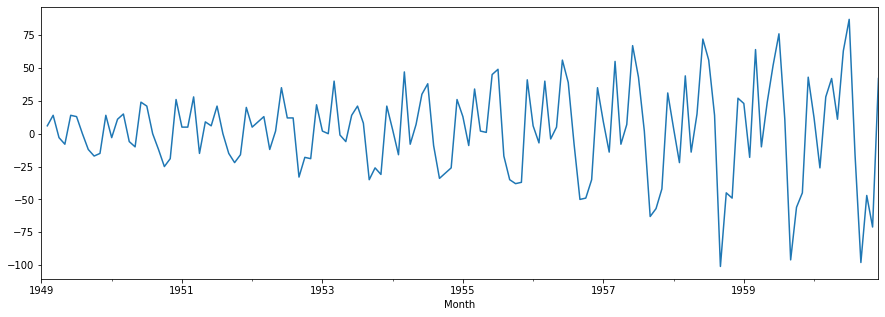

In [23]:
ts = Data['Passengers']
ts_diff = ts - ts.shift()
ts_diff.plot(figsize = (15,5))

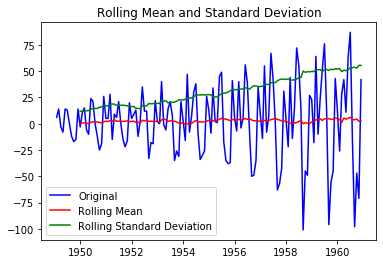

ADF Statistics: -2.829267
P Value: 0.054213
Critical Values:
	 1%:-3.482
	 5%:-2.884
	 10%:-2.579


In [24]:
ts_diff.dropna(inplace = True)
test_stationarity(ts_diff)

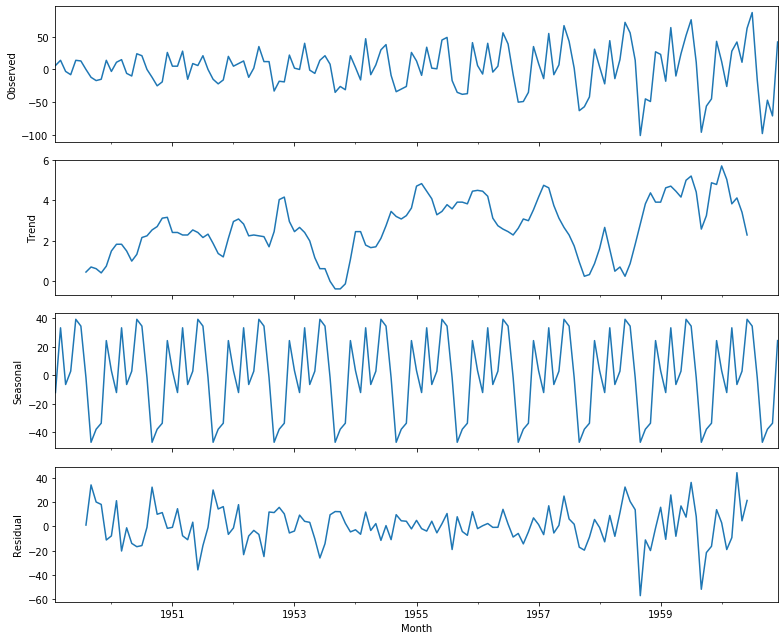

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,9 

decomposition = sm.tsa.seasonal_decompose(ts_diff)
fig = decomposition.plot()
plt.show()

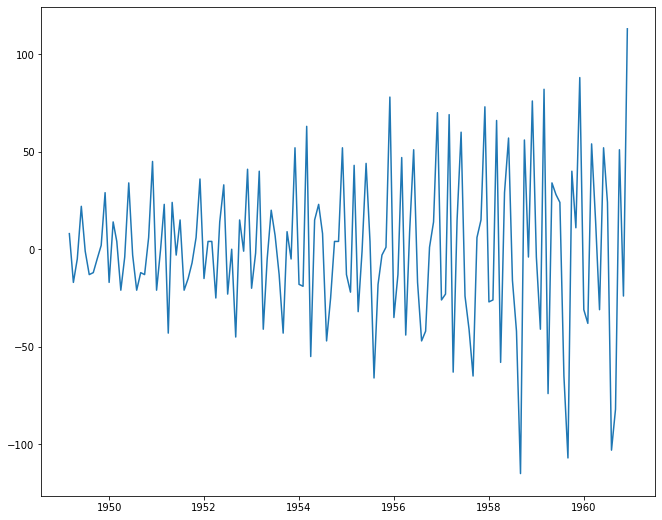

In [26]:
# stationarity of second order 
ts_diff_2 = ts_diff - ts_diff.shift()
plt.plot(ts_diff_2)
plt.show()

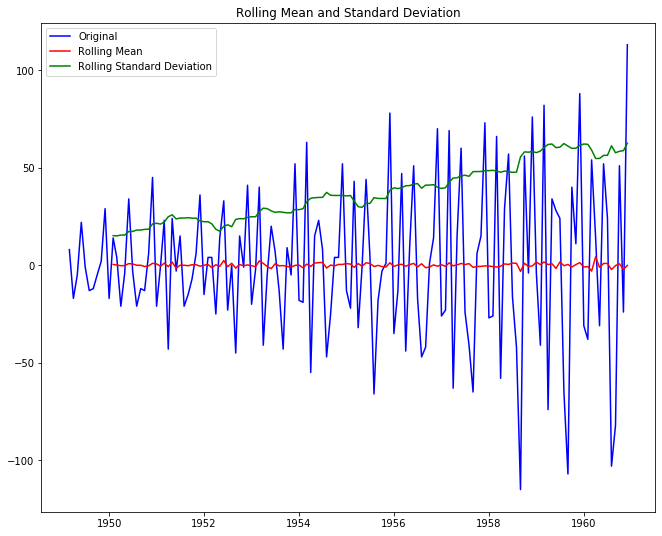

ADF Statistics: -16.384232
P Value: 0.000000
Critical Values:
	 1%:-3.482
	 5%:-2.884
	 10%:-2.579


In [27]:
ts_diff_2.dropna(inplace = True)
test_stationarity(ts_diff_2)

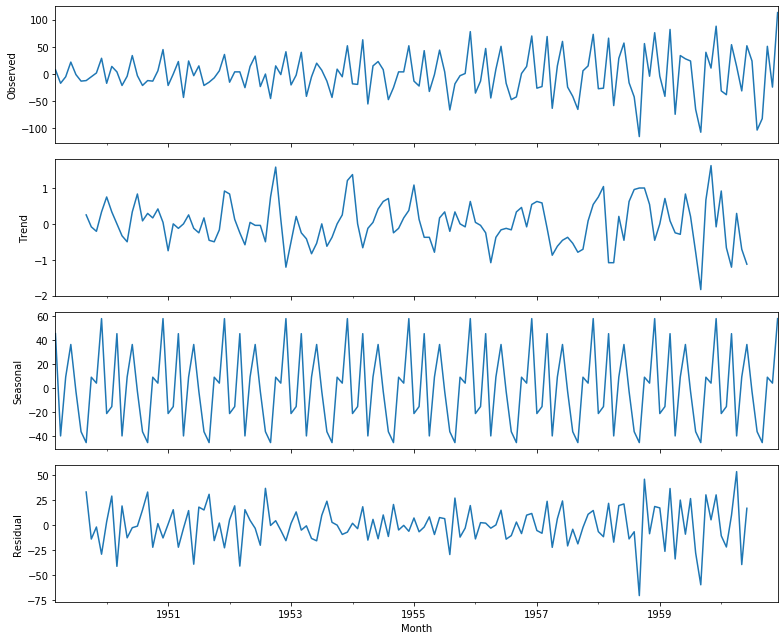

In [28]:
# Again decompose 
from pylab import rcParams
rcParams['figure.figsize'] = 11,9 

decomposition = sm.tsa.seasonal_decompose(ts_diff_2)
fig = decomposition.plot()
plt.show()

# ACF and PACF Plots for Timeseries

In [31]:
from statsmodels.tsa.stattools import acf, pacf 
import warnings 
warnings.filterwarnings("ignore")

In [32]:
lags_acf = acf(ts_diff_2, nlags = 20)
lags_pacf = pacf(ts_diff_2, nlags = 20, method = 'ols')

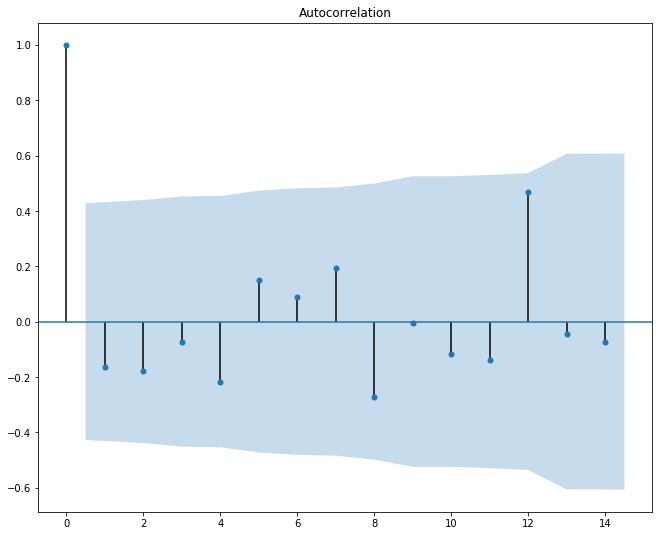

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lags_acf)
plt.show()

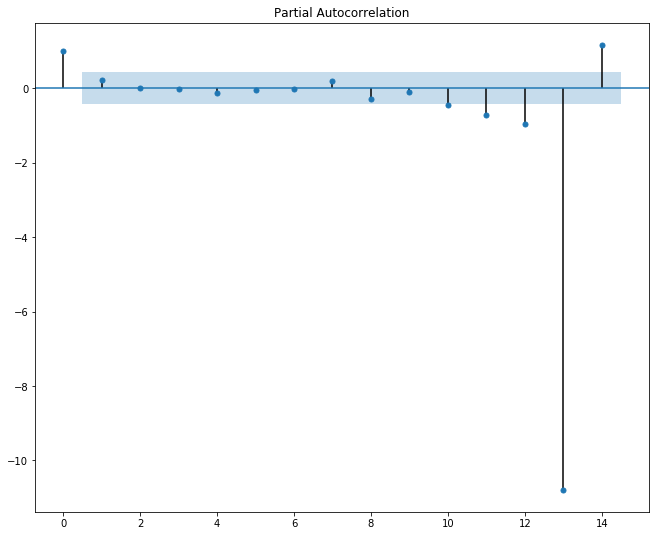

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lags_pacf)
plt.show()

# Now applying Seasonal ARIMA Model for Forecasting 

In [38]:
mod = sm.tsa.statespace.SARIMAX(x, order = (0,2,1),
                                    seasonal_order = (0,2,1,12))

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      9.090     -0.110      0.912     -18.815      16.816
ma.S.L12      -0.9988     22.379     -0.045      0.964     -44.862      42.864
sigma2       149.7230   3283.022      0.046      0.964   -6284.882    6584.328


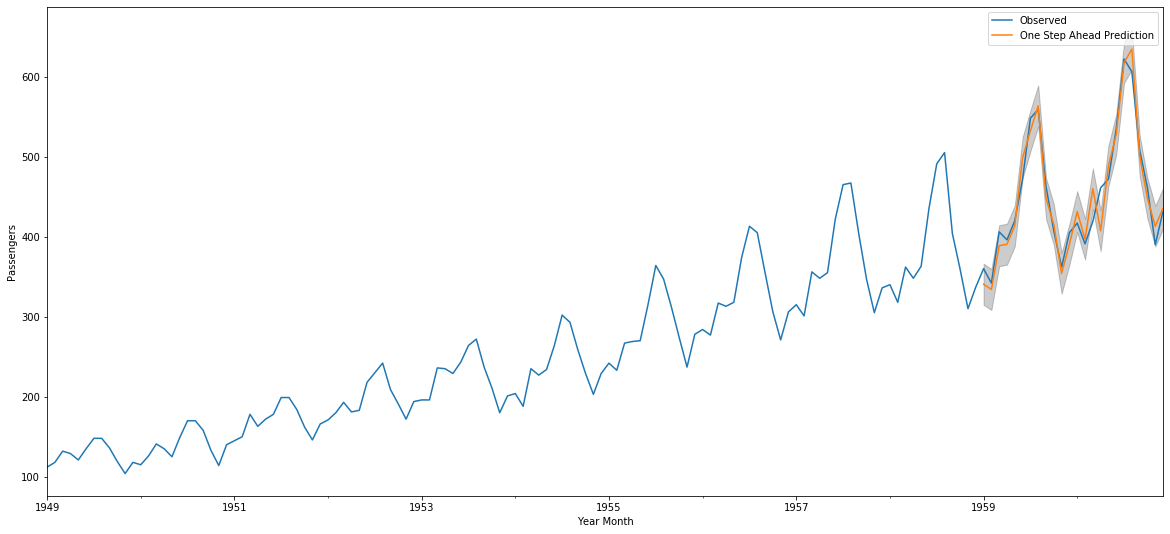

In [40]:
pred = results.get_prediction(start = pd.to_datetime('1959-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = x['1949':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax, label = 'One Step Ahead Prediction', figsize = (20,9))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Year Month')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()


In [41]:
x_forecasted = pred.predicted_mean
x_truth = x['1949-01-01':]
MSE = ((x_forecasted - x_truth)**2).mean()
print('Root Mean Square Error of Forecast is: {}'.format(round(np.sqrt(MSE), 2)))

Root Mean Square Error of Forecast is: 19.44


In [42]:
x_forecasted

Month
1959-01-01    340.554746
1959-02-01    333.966439
1959-03-01    388.653895
1959-04-01    390.608610
1959-05-01    413.539917
1959-06-01    498.608932
1959-07-01    532.222895
1959-08-01    563.415626
1959-09-01    447.858447
1959-10-01    415.014172
1959-11-01    354.152013
1959-12-01    390.562587
1960-01-01    431.338521
1960-02-01    396.739878
1960-03-01    459.984365
1960-04-01    407.205768
1960-05-01    488.484872
1960-06-01    527.673330
1960-07-01    617.351807
1960-08-01    634.262345
1960-09-01    501.105286
1960-10-01    447.761627
1960-11-01    412.955832
1960-12-01    435.357733
Freq: MS, dtype: float64

# Forecasting

In [46]:
# Let's Predict next 24 months 

In [47]:
predict = results.get_forecast(steps = 24)
predict_ci = predict.conf_int()

            lower Passengers  upper Passengers
1961-01-01        419.483578        470.281986
1961-02-01        379.014338        451.592851
1961-03-01        398.954014        488.858215
1961-04-01        436.824563        541.828653
1961-05-01        442.018036        560.748495
1961-06-01        502.410686        633.924772
1961-07-01        589.421149        733.028108
1961-08-01        565.514348        720.685008
1961-09-01        453.453520        619.769126
1961-10-01        397.653019        574.773883
1961-11-01        315.629436        503.274563
1961-12-01        354.361147        552.294494
1962-01-01        351.321267        582.642049
1962-02-01        302.823135        564.599977
1962-03-01        317.765491        607.844248
1962-04-01        353.131943        669.936316
1962-05-01        353.374175        695.697258
1962-06-01        411.549509        778.436326
1962-07-01        498.657113        889.332864
1962-08-01        466.721597        880.545127
1962-09-01   

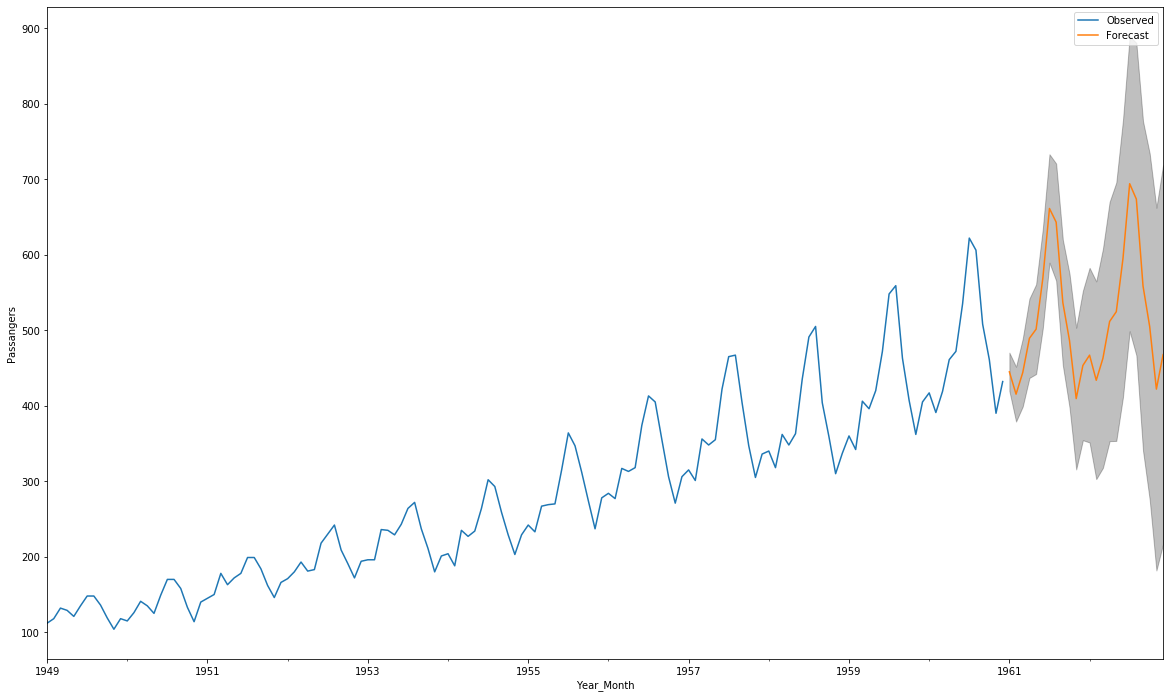

In [49]:
ax = x.plot(label = 'Observed', figsize = (20,12))
predict.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(predict_ci.index,
                predict_ci.iloc[:, 0],
                predict_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Year_Month')
ax.set_ylabel('Passangers')
print(predict_ci)
plt.legend()
plt.show()